# CNN MODEL FOR BINARY IMAGE CLASSIFICATION  



### Introduction   

In this notebook I will use CNN model to classify the images belonging to two classes. For this purpose the data set has been used from Kaggale website. The data contains 25000 images of 'dogs' and 'cats' in .jpg format in equal distribution i.e, there are 12500 images for each class. The Kaggale API has been used to upload data to this notebook.

In [0]:
!pip install -q kaggle # installing kaggale 

In [0]:
# Upload kaggale.json file to the directory of this notebook
from google.colab import files  
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Creating directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# Using kaggale API to download zipped data to the notebok
! kaggle competitions download -c dogs-vs-cats

In [0]:
!unzip train.zip # Unzip the training file

In [0]:
""""
We import important libraries to read and write image data
cv2 : for to resize the image
"""
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os, random, cv2
%matplotlib inline

In [0]:
print(os.listdir(os.getcwd()))

['.config', 'test1.zip', 'kaggle.json', 'train', 'sampleSubmission.csv', 'train.zip', 'sample_data']


In [0]:
filenames = os.listdir("/content/train")
print("The number of traing examples:" + str(len(filenames)))
print("the samples:", filenames[:5])

The number of traing examples:25000
the samples: ['dog.9671.jpg', 'cat.6869.jpg', 'dog.11457.jpg', 'dog.9068.jpg', 'cat.10642.jpg']


(374, 500, 3)

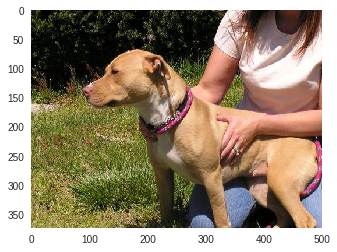

In [0]:
sample =plt.imread('/content/train/' + random.choice(filenames))
plt.imshow(sample)
plt.grid(False)
sample.shape

In [0]:
# Creating path in the directory to access image data

train_images = ['/content/train/' + i for i in filenames]
train_images[:10]

['/content/train/dog.9671.jpg',
 '/content/train/cat.6869.jpg',
 '/content/train/dog.11457.jpg',
 '/content/train/dog.9068.jpg',
 '/content/train/cat.10642.jpg',
 '/content/train/cat.6346.jpg',
 '/content/train/cat.5589.jpg',
 '/content/train/cat.2822.jpg',
 '/content/train/dog.301.jpg',
 '/content/train/dog.10388.jpg']

In [0]:
"""
We define a function that will convert the image from
jpg format to ndarray.
We also create a target class Y
1: dog, 0: cat
"""

def prepare_data(image_list):
  """
  We convert from jpg image format to ndarray
  Return 
  X ndarray of image
  Y label of image
  """
  height = 128  # height of the resized image
  width = 128   # width of the resized image
  X = []
  Y = []
  
  for img in image_list:
    
    image = cv2.imread(img) # Convert to ndarray format
    image_res = cv2.resize(image, (width, height))
    X.append(image_res)
    
  for i in image_list:
    if 'dog' in i:
      Y.append(1)
    elif 'cat' in i:
      Y.append(0)
    
  return X, Y    

In [0]:
X, Y = prepare_data(train_images)

(128, 128, 3)

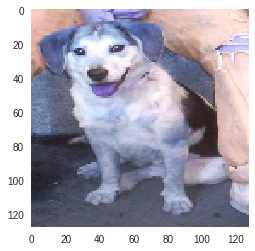

In [0]:
plt.imshow(X[239]) # Plot a sample image
plt.grid(False)
X[235].shape

(25000, 128, 128, 3)

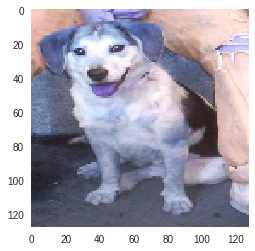

In [0]:
# Reshape the dimension of images  so that it can be fed into Keras API
# The required dimension: (#images, height, width, RGB)

X = np.array([X]).reshape(-1,128,128,3)
plt.imshow(X[239,:,:,:])
plt.grid(False)
X.shape

In [0]:
Y = np.array([Y]).reshape(1,25000)
Y.shape

(1, 25000)

In [0]:
# Split the data into training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y.T,test_size=0.20,
                                                    random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((20000, 128, 128, 3), (20000, 1), (5000, 128, 128, 3), (5000, 1))

In [0]:
# clear memory
import gc
del X,Y
gc.collect()

2197

Text(0.5, 1.0, 'The number of Dogs and Cats in training data')

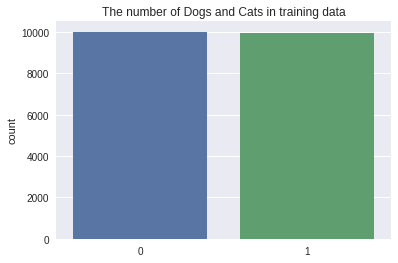

In [0]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(np.ravel(y_train))
plt.title('The number of Dogs and Cats in training data')

Text(0.5, 1.0, 'The number of Dogs and Cats in validation data')

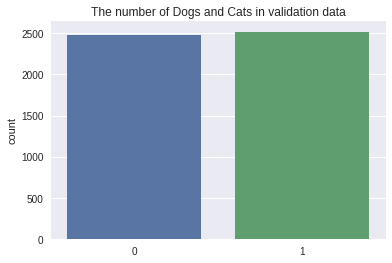

In [0]:
sns.countplot(np.ravel(y_test))
plt.title('The number of Dogs and Cats in validation data')

# VGG-16 INSPIRED MODEL   

### What is VGG-16  

This model was developed by Simonyan and Zisserman in 2015  for Image  Net classification problem to classify the images belonging to 1000 classes with 70.50%  top 1 accuarcy and 90.0% top 5 accuracy.  
This model is know for its simplicity. It has 16 layers of cov-net and dense layers. Here max pooling has been used to reduce the dimensions instead of average pooling.  

## The model built in this notebook  

I have built the model based on the architecture of the VGG-16, but instead of 16 layers it has 10 layers.  

###Architecture  

**Note:**  The size of convolutional filters are (3,3) for all the layers with strides =1 and padding is **same**. The size of pooling layers are (2,2) for all the layers  



1.   Convolution using 64 filters with relu activation
2.   Convolution using 64 filters with relu activation + max pooling

1.   Convolution using 128 filters with relu activation
2.   Convolution using 128 filters with relu activation + max pooling

1.   Convolution using 256 filters with relu activation + max pooling
2.   Convolution using 512 filters with relu activation + max pooling

1.   Convolution using 512 filters with relu activation + max pooling
2.   Dense layer of 1024 neurons  with relu activation

1.   Dense layer of 1024 neurons with relu activation
2.   Output layer with sigmoid activation

















In [0]:
# Importing important libraries 

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
# Model building
"""
We build a VGG16 model. There are 16 layers
Every group of convolution layer is followed by MaxPool layer.
"""
size = (3,3) # size of filter for conv layer
input_size = (128,128,3)

model_vgg16 = Sequential()

model_vgg16.add(Conv2D(filters = 64, kernel_size = size, padding = 'same',
                      activation = 'relu',input_shape = input_size))
model_vgg16.add(Conv2D(filters = 64, kernel_size = size, padding = 'same',
                      activation = 'relu'))

model_vgg16.add(MaxPooling2D(pool_size = 2, strides = 2))

model_vgg16.add(Conv2D(filters = 128, kernel_size = size, padding = 'same',
                      activation = 'relu'))
model_vgg16.add(Conv2D(filters = 128, kernel_size = size, padding = 'same',
                      activation = 'relu'))

model_vgg16.add(MaxPooling2D(pool_size = 2, strides = 2))

model_vgg16.add(Conv2D(filters = 256, kernel_size = size, padding = 'same',
                      activation = 'relu'))


model_vgg16.add(MaxPooling2D(pool_size = 2, strides = 2))

model_vgg16.add(Conv2D(filters = 512, kernel_size = size, padding = 'same',
                      activation = 'relu'))


model_vgg16.add(MaxPooling2D(pool_size = 2, strides = 2))

model_vgg16.add(Conv2D(filters = 512, kernel_size = size, padding = 'same',
                      activation = 'relu'))

model_vgg16.add(MaxPooling2D(pool_size = 2, strides = 2))

model_vgg16.add(Flatten())

model_vgg16.add(Dense(1024, activation = 'relu'))
model_vgg16.add(Dense(1024, activation = 'relu'))

model_vgg16.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       295168    
__________

**model_vgg16 ** architecture has been ready. Now, we will compile the model. There are three very essential arguments to compile this model.  


1.  ** Loss:** We have used binary crossentropy function to define loss. We could have used *log loss derived from maximum likelihood estimation* but it has been observed that the cross entropy works well for deep neural network
2.  ** Optimizer:** The SGD( gradient descent) is used to adjust the weights by minimizing the cost function with learning rate equals to 0.01

1.   **Metrics:** For evaluation of our model the 'accuracy' metrics has been used. It simply equals to the ratio of correct classification and total instances.






In [0]:
model_vgg16.compile(loss = 'binary_crossentropy',
                    optimizer = optimizers.SGD(lr = 0.05), metrics = ['acc'])

## Image Augmentation  

To train a deep neural network like VGG16 we need lots of data otherwise the model will overfit the data. But unfortunately we still don't have access to so much labeled data to train our complex deep neural nets.  
This problem of scarcity of data has been resolved to certain extent by using the technique of image augmentation. In this technique what we do we create the different copies of same image by changing its orientation, brightness, by flipping the image horizontally, vertically or at same angle., and there are many more ways.   

**ImageDataGenerator**  
ImageDataGenerator is a wonderful function of Keras which produces the  copied images in batches from the original data set in real time and the data is continuously fed into model training.  
The great thing about this function is that it doesn't require the memory on RAM to keep the copies of the original data set.

In [0]:
datagen_train = ImageDataGenerator(rescale = 1/255, horizontal_flip = True,
                            rotation_range = 40, zoom_range = 0.40)
datagen_val = ImageDataGenerator(rescale=1/255)

In [0]:
datagen_train.fit(x_train)
datagen_val.fit(x_test)

In [0]:
"""
The model training starts. Here, ImageDataGenerator is continuously generating 
the images of varying orientations and intensities and has been fed to model
training on real time basis
"""
vgg16_hist = model_vgg16.fit_generator(datagen_train.flow(x_train,y_train,
             batch_size=64),epochs=40, validation_data =datagen_val.flow(x_test,
             y_test, batch_size = 32),steps_per_epoch =x_train.shape[0]//64,
              validation_steps=x_test.shape[0]//32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
312/312 [==============================] - 135s 433ms/step - loss: 0.6914 - acc: 0.5320 - val_loss: 0.6853 - val_acc: 0.5833
Epoch 2/40
312/312 [==============================] - 126s 404ms/step - loss: 0.6830 - acc: 0.5607 - val_loss: 0.6742 - val_acc: 0.5707
Epoch 3/40
312/312 [==============================] - 124s 399ms/step - loss: 0.6743 - acc: 0.5849 - val_loss: 0.6555 - val_acc: 0.6260
Epoch 4/40
312/312 [==============================] - 124s 399ms/step - loss: 0.6589 - acc: 0.6075 - val_loss: 0.6523 - val_acc: 0.6483
Epoch 5/40
312/312 [==============================] - 124s 397ms/step - loss: 0.6391 - acc: 0.6401 - val_loss: 0.6226 - val_acc: 0.7013
Epoch 6/40
312/312 [==============================] - 124s 397ms/step - loss: 0.6089 - acc: 0.6698 - val_loss: 0.5470 - val_acc: 0.7299
Epoch 7/40
312/312 [==============================] - 124s 397ms/step - loss: 0.5757 - acc: 0.6943 - val_loss: 0.5190 - val_acc: 0.7464


### Model Training  

The training of model took more than **1 hour 20 minutes** on Tesla K80 GPU.   

**Accuracy and overfitting**  The model has almost identical training and validation accuracy of more than 92% strongly suggesting that the model is not overfitted.  

Without using image augmentation the model got a training accuracy of 98% in just 12 epochs while the validation accuracy was below 80%.  

**Note** We could have used regularization or dropout to control the overfitting but we didn't use.

In [0]:
acc = vgg16_hist.history['acc']
loss = vgg16_hist.history['loss']
val_acc = vgg16_hist.history['val_acc']
val_loss = vgg16_hist.history['val_loss']

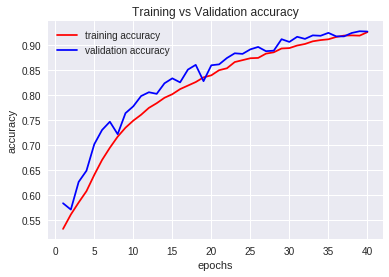

In [0]:
epoch = range(1,len(acc)+1)
plt.subplot()
plt.plot(epoch,acc,'r', label='training accuracy')
plt.plot(epoch, val_acc,'b', label='validation accuracy')
plt.legend()
plt.title('Training vs Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [0]:
# save the trained model
import h5py
model_vgg16.save('model_vgg16.h5')

### Save the model  

We save the model in **Google Drive**. For this purpose we first need to mount google drive on this notebook. After this we will save the model in drive by locating the path

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model_save_name = 'model_vgg16.h5'
path = "/content/gdrive/My Drive/{model_save_name}" 
model_vgg16.save(path)

In [0]:
# Unzip the test file 
! unzip test1.zip

In [0]:
files_test = ['/content/test1/' + i for i in os.listdir('/content/test1')]
files_test[:10]

['/content/test1/3573.jpg',
 '/content/test1/6169.jpg',
 '/content/test1/7607.jpg',
 '/content/test1/2807.jpg',
 '/content/test1/3873.jpg',
 '/content/test1/136.jpg',
 '/content/test1/5815.jpg',
 '/content/test1/730.jpg',
 '/content/test1/51.jpg',
 '/content/test1/9630.jpg']

In [0]:
"""
We convert the test image format from .jpg to ndarray
"""

X_test = []

for img in files_test:
    
    image = cv2.imread(img) # Convert to ndarray format
    image_res = cv2.resize(image, (128, 128))
    X_test.append(image_res)

In [27]:
X_test = np.array([X_test]).reshape(-1,128,128,3)
X_test.shape

(12500, 128, 128, 3)

In [0]:
# Upload the model from google drive

from keras.models import load_model
model_vgg16 = load_model('/content/gdrive/My Drive/model_vgg16.h5')

In [0]:
# Model prediction on test set

datagen_val.fit(X_test) # Fit ImageDataGenerator to rescale the images for testing 
test_gen = datagen_val.flow(X_test, batch_size = 1)

predict = model_vgg16.predict_generator(test_gen, steps= X_test.shape[0])

In [49]:
"""
predict is an array which contains the probability of data to be dog or cat
If the element in array predict > 0.50 then it is dog else it is cat
"""
predict[0:10,:]

array([[8.9608980e-03],
       [2.2289867e-03],
       [1.0576730e-04],
       [7.8865542e-06],
       [4.5655340e-01],
       [9.2796522e-01],
       [9.9789459e-01],
       [9.9980539e-01],
       [1.2134289e-03],
       [9.9571288e-01]], dtype=float32)

### Visualize the prediction 

We visualize the prediction on first ten data in the test data set

In [0]:
text_label = []
for i in range(10):
  if predict[i] > 0.50:
    text_label.append('Dog')
  else:
    text_label.append('Cat')
  i += i

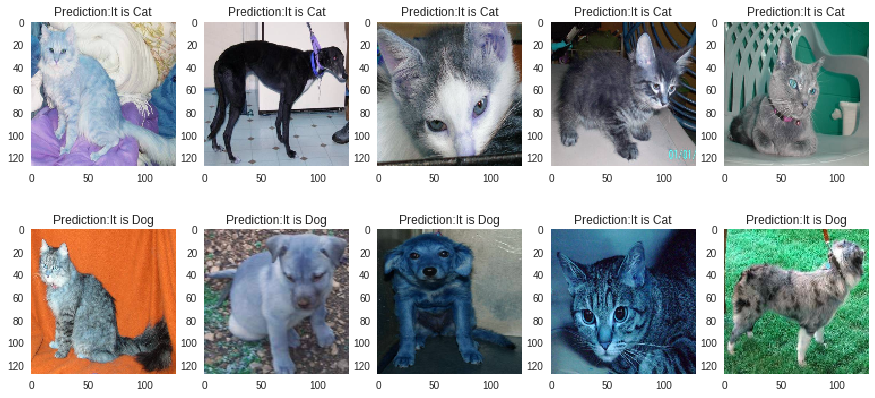

In [66]:
plt.figure(figsize=(15,7))
for i in range(10):
  plt.subplot(2,5,1+i)
  plt.imshow(X_test[i])
  plt.grid(False)
  plt.title("Prediction:It is "+ str(text_label[i]))
  i+=i